In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from user import User
from experiment import *
from hasher_implems import *


def init_experiment(hasher: Hasher):
    exp = Experiment()
    exp.hasher = hasher
    return exp

In [3]:
# Generation of data

def gen_data(hasher: Hasher, population):
    
    header = ["userId", "ExperimentA", "ModA", "ExperimentB", "ModB"]
    data = []
    
    expA = init_experiment(hasher)
    expB = init_experiment(hasher)
    
    for i in range(1, population):
        user = User(i)
        varA = expA.assign(user)
        varB = expB.assign(user)
        data.append([user.id, varA.name, hasher.hash(f"{user.id}{expA.id}") % 100, varB.name, hasher.hash(f"{user.id}{expB.id}") % 100])

    df = pd.DataFrame(np.array(data), columns=header)
    
    df = pd.concat([pd.to_numeric(df["userId"]),
                  df["ExperimentA"],
                  pd.to_numeric(df["ModA"]),
                  df["ExperimentB"],
                  pd.to_numeric(df["ModB"])],
                  axis = 1)
    return df

In [12]:
# Built-In Hash

df_bi = gen_data(BuiltInHasher(), 1000)

df_bi.info()
df_bi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
userId         9999 non-null int64
ExperimentA    9999 non-null object
ModA           9999 non-null int64
ExperimentB    9999 non-null object
ModB           9999 non-null int64
dtypes: int64(3), object(2)
memory usage: 390.7+ KB


,userId,ExperimentA,ModA,ExperimentB,ModB
0,1,variation1,97,variation1,18
1,2,variation2,83,variation1,23
2,3,variation1,70,variation2,86
3,4,variation1,36,variation2,29
4,5,variation1,48,variation1,79


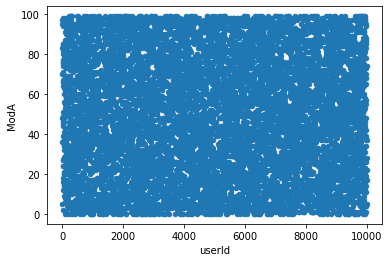

In [13]:
data_bi = pd.concat([df_bi["userId"], df_bi["ModA"]], axis = 1)
data_bi.plot.scatter(x="userId", y="ModA");

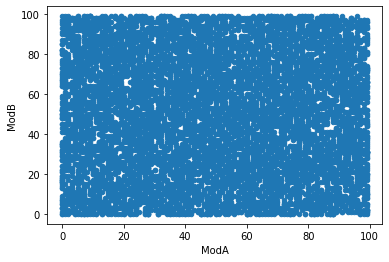

In [14]:
data_bi = pd.concat([df_bi["ModA"], df_bi["ModB"]], axis = 1)
data_bi.plot.scatter(x="ModA", y="ModB");

In [15]:
# MD5

df_md5 = gen_data(BuiltInHasher(), 1000)

df_md5.head()

,userId,ExperimentA,ModA,ExperimentB,ModB
0,1,variation2,13,variation2,71
1,2,variation2,1,variation2,20
2,3,variation1,34,variation2,84
3,4,variation1,99,variation1,87
4,5,variation1,65,variation2,36


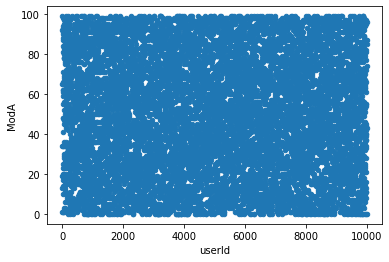

In [16]:
data_md5 = pd.concat([df_md5["userId"], df_md5["ModA"]], axis = 1)
data_md5.plot.scatter(x="userId", y="ModA");

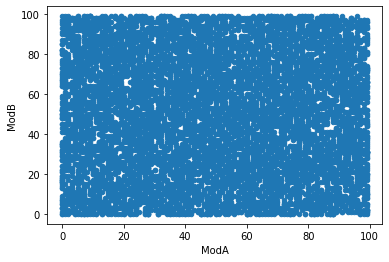

In [17]:
data_md5 = pd.concat([df_bi["ModA"], df_bi["ModB"]], axis = 1)
data_md5.plot.scatter(x="ModA", y="ModB");